## Создание искусственных нейронных сетей

### Импорт собранных и обработанных данных

In [1]:
import pandas as pd

# Для mac
df_nlp = pd.read_csv(r'/Users/user/Documents/ML.csv')

# Для win
#df_nlp = pd.read_csv(r'C:\Users\User\Downloads\ML.csv'), если в начале лишних столбец с индексами

df_ml = df_nlp.drop(df_nlp.columns[[0,3,4,5,6,7,8,9,10]], axis = 1)

categories = {}
for key, value in enumerate(df_ml["main_rubric"].unique()):
    categories[value] = key + 1
df_ml['category_code'] = df_ml['main_rubric'].map(categories)

df_ml

,main_rubric,rubric,text_lemm,title_lemm,category_code
0,Происшествия,Происшествия,количество пострадать стройка краснознаменск р...,число пострадать обрушение строительный лес по...,1
1,Происшествия,Происшествия,инцидент происходить накануне лес устанавливат...,число пострадать обрушение лес краснознаменск ...,1
2,Происшествия,Происшествия,число пострадать обрушение строительный лес по...,экстренные служба число пострадать обрушение л...,1
3,Происшествия,Происшествия,напомним инцидент стройка подмосковный красноз...,число пострадать обрушение стройка подмосковье...,1
4,Происшествия,Происшествия,результате обрушение строительный лес краснозн...,число пострадать обрушение лес краснознаменск ...,1
...,...,...,...,...,...
3360,Наука,Космос,несмотря огромный сила гравитация солнце плане...,ученые объяснять почему планета сталкиваться с...,9
3361,Наука,Космос,главная причина который планета преодолевать м...,ученые рассказывать мешать планета сталкиватьс...,9
3362,Наука,Космос,сила гравитация удерживать планета солнечный с...,планеты преодолевать гравитация солнце сталкив...,9
3363,Наука,Космос,однако несмотря это планета держаться определе...,стало известно почему планета сталкиваться сол...,9


### Импорт необходимых библиотек

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.preprocessing import OneHotEncoder

### TensorFlow

In [3]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm, trange

# from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score

# from gensim.models import Word2Vec

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras import backend as K
# from keras.engine.topology import Layer

2022-12-20 16:03:34.376198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Количество уникальных тем:  9
3365
                                              text_lemm
3082  планшет google pixel попадать рынок сша вместе...
2028  форвард мадридский футбольный клуб реал карий ...
509   ранее день корреспондент известие александр со...
644   россияне обращаться просьба освобождать домашн...
597     сообщают известие ссылка данные платформа спарк
...                                                 ...
1095  ограничение проезд действовать час связь работ...
1130  планы запускать трамвай троллейбус внутри метр...
1294  отправлять новый ключевой потребитель заменять...
860   икона написать год сербия благословение настоя...
3174  сильно распространять называть ген алкоголизм ...

[2355 rows x 1 columns]
                                              text_lemm
1116  любителей объезжать пробка обочина подготовить...
2358  алина загитов получать приз кп работа телеэфир...
807   верующим необходимо милосердный деятельный ден...
2700  артисты свердловский область выступать

2022-12-20 16:03:43.653214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/14
31/34 [==========================>...] - ETA: 0s - loss: 1.8964 - accuracy: 0.4798
Epoch 1: val_accuracy improved from -inf to 0.67373, saving model to model.h5
34/34 [==============================] - 1s 22ms/step - loss: 1.8671 - accuracy: 0.4922 - val_loss: 1.4048 - val_accuracy: 0.6737
Epoch 2/14
33/34 [============================>.] - ETA: 0s - loss: 0.8297 - accuracy: 0.8774
Epoch 2: val_accuracy improved from 0.67373 to 0.82627, saving model to model.h5
34/34 [==============================] - 1s 17ms/step - loss: 0.8285 - accuracy: 0.8778 - val_loss: 0.7617 - val_accuracy: 0.8263
Epoch 3/14
31/34 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.9728
Epoch 3: val_accuracy improved from 0.82627 to 0.86017, saving model to model.h5
34/34 [==============================] - 1s 15ms/step - loss: 0.2766 - accuracy: 0.9726 - val_loss: 0.5532 - val_accuracy: 0.8602
Epoch 4/14
31/34 [==========================>...] - ETA: 0s - loss: 0.1222 - accuracy: 0

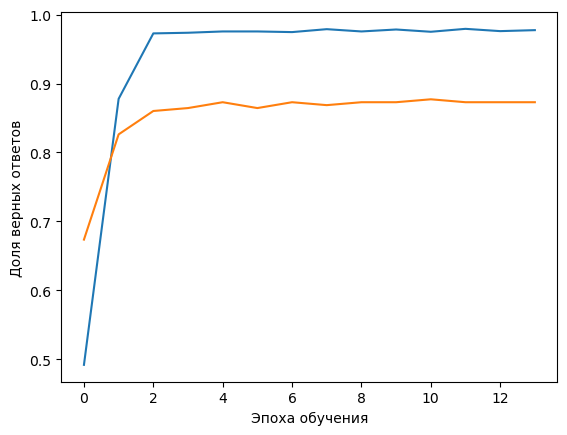

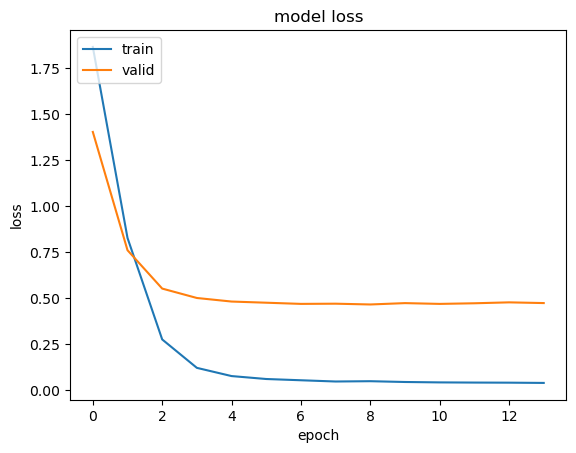

In [4]:
X = df_ml.loc[:, ['text_lemm']]
y = df_ml.loc[:, ['main_rubric','category_code']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df = df_ml
print("Количество уникальных тем: ", len(df['main_rubric'].unique()))
print(len(df['text_lemm']))
#print(df['text_lemm'].tolist())


# Избавляемся от пустых строк
df = df[df['text_lemm'].notna()]

X_train = X_train[X_train.notna()]
X_test = X_test[X_test.notna()]
y_train = y_train[y_train.notna()]
y_test = y_test[y_test.notna()]

print(X_train)
print(X_test)
print(y_train)
print(y_test)


max_words = 0
for text in X_train['text_lemm']:
    words = len(text.split())
    if words > max_words:
        max_words = words
print('Максимальное количество слов в самом длинном описании заявки: {} слов'.format(max_words))


# Максимальное количество слов
num_words = 10000 #Можно менять

# Количество классов (тем)
rubrics = ['Политика', 'Общество', 'Экономика',
           'В мире', 'Спорт', 'Происшествия',
           'Культура', 'Технологии', 'Наука']

nb_classes = len(rubrics)

posts_train = X_train['text_lemm']
posts_test = X_test['text_lemm']

# Максимально количество слов в тексте
max_post_len = 35 #Можно менять

# Преобразуем классы в векторный вид
y_train = to_categorical(y_train['category_code'] - 1, nb_classes)
y_test = to_categorical(y_test['category_code'] - 1, nb_classes)

# Производим токенизацию текста
tokenizer = Tokenizer(num_words=num_words)  # 10000 самых встречаемых слов
#tokenizer = Tokenizer()

tokenizer.fit_on_texts(df_ml['text_lemm'].tolist())
print(len(tokenizer.index_word))
#num_words = len(tokenizer.index_word) - 1

# Слова в виде чисел
sequences_train = tokenizer.texts_to_sequences(posts_train.to_list())
sequences_test = tokenizer.texts_to_sequences(posts_test.to_list())

# Преобразуем векторы к одной длине путем добавления нулей
x_train = pad_sequences(sequences_train, maxlen=max_post_len)
x_test = pad_sequences(sequences_test, maxlen=max_post_len)

'''
word_index = tokenizer.word_index

tokens = []
for text in df_train['text_lemm']:
    token = text.split(' ')
    token = [tok for tok in token if tok != "" and tok != '\n']
    tokens.append(token)

df_train['tokens'] = tokens
data = df_train['tokens']
print(data)
w2v_model = Word2Vec(data, min_count=1, size=100, window=5)

embedding_index = dict()
for word in w2v_model.wv.vocab:
    embedding_index[word] = w2v_model.wv.word_vec(word)
print(embedding_index)


def prepare_matrix(embedding_dict, emb_size=100):
    num_words = len(word_index)
    embedding_matrix = np.zeros((num_words, emb_size))

    for word, i in tqdm(word_index.items()):
        if i >= num_words:
            continue

        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec
    return embedding_matrix


embedding_matrix = prepare_matrix(embedding_index)
num_words = len(word_index)
'''


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
# print(x_train)

#print(x_train)
#print(tokenizer.word_index)
#print(len(x_train))

#smote = SMOTE(sampling_strategy='auto',
#              random_state=0,
#              k_neighbors=4)
#X_train, y_train = smote.fit_resample(x_train, y_train)
#X_test, y_test = smote.fit_resample(x_test, y_test)
#print(len(X_sm))
#print(len(X_train))

# Сеть LSTM ############################################################

model = Sequential()

'''
model.add(Embedding(num_words, 256, input_length=max_post_len))
model.add(Dropout(0.5))
model.add(GRU(256))
model.add(Dropout(0.5))
model.add(Dense(207, activation='softmax'))
'''
'''
model.add(Embedding(num_words, 256, input_length=max_post_len))
model.add(Dropout(0.5))
model.add(LSTM(256, recurrent_dropout=0.5))
model.add(Dropout(0.5))
model.add(Dense(210, activation='softmax'))
'''

model.add(Dense(256, activation='relu', input_shape=(10000,))) #Можно менять dense 256
model.add(Dropout(0.2)) #Можно менять Dropout
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(207, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.summary()


'''
model.add(Embedding(num_words, 202, input_length=max_post_len))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(207, activation='softmax'))
'''
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('model1.h5')
model_save_path = 'model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

history = model.fit(x_train,
                    y_train,
                    epochs=14, #Можно менять
                    batch_size=64, #Можно менять
                    validation_split=0.1, #Можно менять
                    callbacks=[checkpoint_callback])

score = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

print()
print("Оценка теста: {}".format(score[0]))
print("Оценка точности модели: {}".format(score[1]))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
#plt.legend()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
